# **Twitter Abuse Detection**
---

### **IMPORTING DEPENDENCIES AND DATASET**

---



In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [43]:
!pip install openpyxl

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [45]:
df = pd.read_excel(r"FountaDataset.xlsx")
df.drop(columns=["No.Of Votes"],axis=1,inplace=True)
df = df.dropna()

In [46]:
df

,Tweets,Majority Label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [47]:
df.isnull().count()

Tweets            99994
Majority Label    99994
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Majority Label'] = label_encoder.fit_transform(df['Majority Label'])

In [49]:
df = df.rename(columns={'Tweets': 'tweet', 'Majority Label': 'class'})

In [50]:
# Data preprocessing
X = df['tweet']
y = df['class']

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **TF-IDF Embedding**

In [52]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [53]:
# SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

In [54]:
# XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_classifier.predict(X_test_tfidf)

In [55]:
# MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100)
mlp_classifier.fit(X_train_tfidf, y_train)
mlp_predictions = mlp_classifier.predict(X_test_tfidf)

D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
# Model evaluation and confusion matrix
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print("-------------------------------------------------------------------------------------------------")
    print(f"Evaluation for {model_name}:\n")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    plot_confusion_matrix(y_test, predictions, model_name)
    print("-------------------------------------------------------------------------------------------------")

In [57]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Abuse', 'Abuse'], yticklabels=['Non-Abuse', 'Abuse'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

-------------------------------------------------------------------------------------------------
Evaluation for SVM:

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5458
           1       0.65      0.24      0.35       955
           2       0.81      0.92      0.86     10820
           3       0.63      0.40      0.49      2766

    accuracy                           0.81     19999
   macro avg       0.74      0.62      0.65     19999
weighted avg       0.80      0.81      0.79     19999



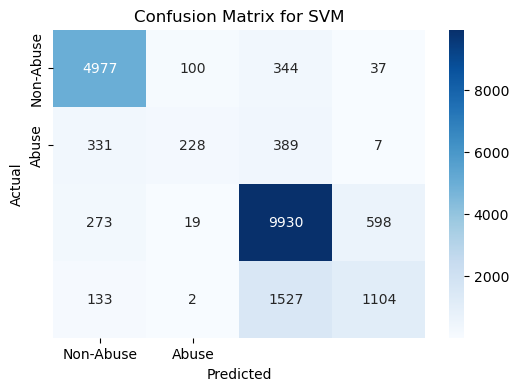

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Evaluation for XGBoost:

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      5458
           1       0.65      0.26      0.37       955
           2       0.80      0.94      0.86     10820
           3       0.64      0.29      0.40      2766

    accuracy                           0.81     19999
   macro avg       0.74      0.60      0.63     19999
weighted avg       0.79      0.81      0.78     19999



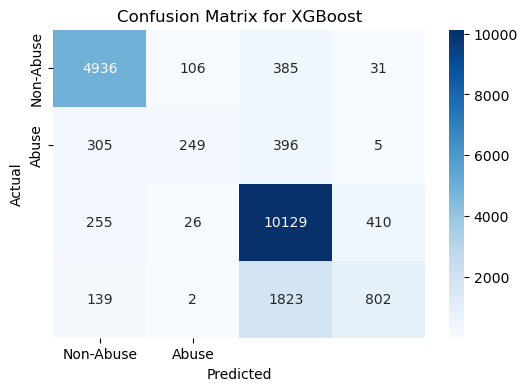

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Evaluation for MLP:

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5458
           1       0.39      0.28      0.33       955
           2       0.81      0.84      0.82     10820
           3       0.47      0.44      0.45      2766

    accuracy                           0.76     19999
   macro avg       0.63      0.61      0.62     19999
weighted avg       0.76      0.76      0.76     19999



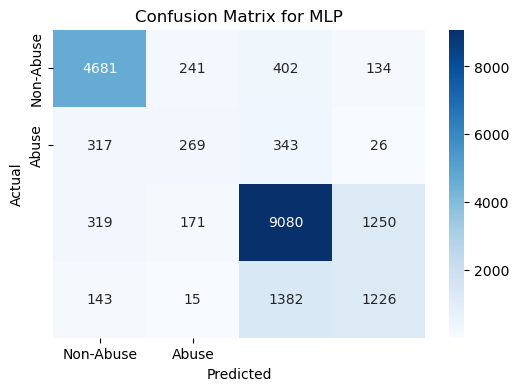

-------------------------------------------------------------------------------------------------


In [58]:
evaluate_model(svm_predictions, "SVM")
evaluate_model(xgb_predictions, "XGBoost")
evaluate_model(mlp_predictions, "MLP")

## **Glove Embedding**

In [59]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM
import numpy as np

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
num_words = len(tokenizer.word_index) + 1

In [62]:
# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [63]:
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [64]:
embedding_dim = 100  # Adjust the dimension as needed
embedding_index = {}
glove_file = 'archive/glove.6B.100d.txt'

with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [65]:
# Create embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [66]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

### Glove + CNN

In [67]:
# GloVe + CNN
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Glove + MLP

In [68]:
# GloVe + MLP
model_mlp = Sequential()
model_mlp.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False))
model_mlp.add(Flatten())
model_mlp.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Glove + Bi-LSTM

In [69]:
# GloVe + Bi-LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False))
model_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(64)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# Model training
model_cnn.fit(X_train, y_train, epochs=10, batch_size=64,class_weight=class_weight_dict)
print("-------------------------------------------------------------------------------------------------")
model_mlp.fit(X_train, y_train, epochs=10, batch_size=64,class_weight=class_weight_dict)
print("-------------------------------------------------------------------------------------------------")
model_lstm.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
1250/1250 [==============================] - 102s 70ms/step - loss: 7.6749 - accuracy: 0.1648
Epoch 2/10
1250/1250 [==============================] - 82s 65ms/step - loss: 7.6452 - accuracy: 0.1611
Epoch 3/10
1250/1250 [==============================] - 68s 55ms/step - loss: 7.4417 - accuracy: 0.1716
Epoch 4/10
1250/1250 [==============================] - 101s 81ms/step - loss: 7.4976 - accuracy: 0.1800
Epoch 5/10
1250/1250 [==============================] - 80s 64ms/step - loss: 7.4023 - accuracy: 0.1783
Epoch 6/10
1250/1250 [==============================] - 80s 64ms/step - loss: 6.8886 - accuracy: 0.2105
Epoch 7/10
1250/1250 [==============================] - 81s 65ms/step - loss: 6.7043 - accuracy: 0.2157
Epoch 8/10
1250/1250 [==============================] - 82s 66ms/step - loss: 6.9777 - accuracy: 0.2128
Epoch 9/10
1250/1250 [==============================] - 80s 64ms/step - loss: 6.7065 - accuracy: 0.2210
Epoch 10/10
1250/1250 [==============================] - 80s 6

### Model Evaluation

In [71]:
# Model evaluation
def evaluate_model(model, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("-------------------------------------------------------------------------------------------------")
    print(f"Evaluation for {model_name}:\n")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("-------------------------------------------------------------------------------------------------")

In [72]:
evaluate_model(model_cnn, "GloVe + CNN")
evaluate_model(model_mlp, "GloVe + MLP")
evaluate_model(model_lstm, "GloVe + Bi-LSTM")

625/625 [==============================] - 8s 10ms/step
-------------------------------------------------------------------------------------------------
Evaluation for GloVe + CNN:

Accuracy: 0.23
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      5458
           1       0.04      0.57      0.07       955
           2       0.00      0.00      0.00     10820
           3       0.00      0.00      0.00      2766

    accuracy                           0.23     19999
   macro avg       0.21      0.33      0.21     19999
weighted avg       0.22      0.23      0.21     19999

-------------------------------------------------------------------------------------------------
  1/625 [..............................] - ETA: 1:06

D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


625/625 [==============================] - 2s 3ms/step


D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------------------------------------------
Evaluation for GloVe + MLP:

Accuracy: 0.05
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.02      0.03      5458
           1       0.05      0.99      0.09       955
           2       0.00      0.00      0.00     10820
           3       0.00      0.00      0.00      2766

    accuracy                           0.05     19999
   macro avg       0.23      0.25      0.03     19999
weighted avg       0.24      0.05      0.01     19999

-------------------------------------------------------------------------------------------------
625/625 [==============================] - 22s 32ms/step
-------------------------------------------------------------------------------------------------
Evaluation for GloVe + Bi-LSTM:

Accuracy: 0.24
Classification Report:
               precision    recall  f1-score   support

           0       

D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Transformer Embeddings**

In [73]:
#!pip install transformers
# A dependency of the preprocessing for BERT inputs
#!pip install -q tensorflow-text
#!pip install -q tf-models-official

In [74]:
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow.keras.backend as K
from scipy.stats import spearmanr
from math import floor, ceil
from transformers import *

np.set_printoptions(suppress=True)
print(tf.__version__)

import shutil

from official.nlp import optimization  # to create AdamW optmizer

tf.get_logger().setLevel('ERROR')

D:\Anaconda\envs\ten_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Anaconda\envs\ten_gpu\lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
D:\Anaconda\envs\ten_gpu\lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
D:\Anaconda\envs\ten_gpu\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated a

2.10.1


D:\Anaconda\envs\ten_gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
D:\Anaconda\envs\ten_gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

In [75]:
df0 = df.copy()
c=df0['class']
df0.rename(columns={'tweet' : 'text','class' : 'category'},inplace=True)

In [76]:
a=df0['text']
b=df0['category'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})

In [77]:
df= pd.concat([a,b,c], axis=1)
df.rename(columns={'class' : 'label'},inplace=True)
df

,text,category,label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,NaN,3
1,RT @Papapishu: Man it would fucking rule if we...,hate_speech,0
2,It is time to draw close to Him &#128591;&#127...,neither,2
3,if you notice me start to act different or dis...,neither,2
4,"Forget unfollowers, I believe in growing. 7 ne...",neither,2
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,hate_speech,0
99992,#Osteporosis treated with #PEMF - rebuild bone...,neither,2
99993,@LGUSAMobile why does my phone screen keeps fl...,neither,2
99994,#bigdata vs. #reality ... but equally applies ...,neither,2


In [78]:
df.groupby('label').count()

,text,category
label,,
0,27149,27149
1,4965,4965
2,53850,53850
3,14030,0


In [79]:
# This is an unbalanced dataset.
#hate, ofensive, neither = np.bincount(df['label'])
#total = hate + ofensive + neither
#print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
#    total, hate, 100 * hate / total))
#print('Examples:\n    Total: {}\n    Ofensive: {} ({:.2f}% of total)\n'.format(
#    total, ofensive, 100 * ofensive / total))
#print('Examples:\n    Total: {}\n    Neither: {} ({:.2f}% of total)\n'.format(
#    total, neither, 100 * neither / total))

ValueError: too many values to unpack (expected 3)

In [80]:
### Splitting the data between train, validation and test sets:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.10,
    random_state=42,
    stratify=df.label.values,
)

X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].label.values,
    test_size=0.10,
    random_state=42,
    stratify=df.loc[X_train_].label.values,
)

In [81]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [82]:
df_train = df.loc[df["data_type"]=="train"]
df_val = df.loc[df["data_type"]=="val"]
df_test = df.loc[df["data_type"]=="test"]

In [83]:
!pip install WordCloud STOPWORDS

<class 'set'>


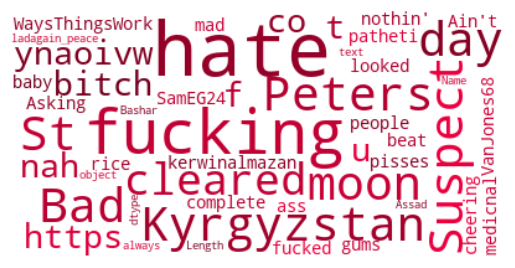

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

print(type(STOPWORDS))

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60,
                          random_state=42
                         ).generate(str(df.loc[df["category"]=="offensive_language"].text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

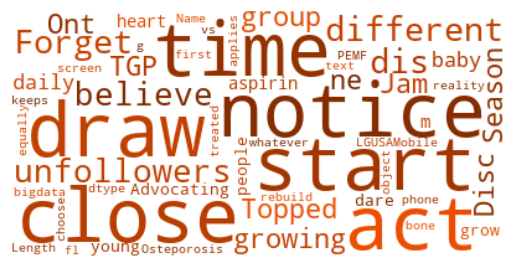

In [85]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60,
                          random_state=42
                         ).generate(str((df.loc[df["category"]=="neither"].text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()


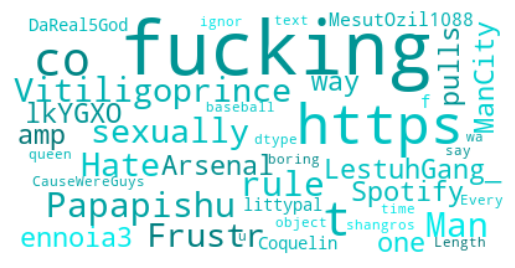

In [86]:
stopwords.add("Name")

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 180
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60,
                          random_state=42
                         ).generate(str((df.loc[df["category"]=="hate_speech"].text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()


In [87]:
train_ds = tf.data.Dataset.from_tensor_slices((df_train.text.values, df_train.label.values))
val_ds = tf.data.Dataset.from_tensor_slices((df_val.text.values, df_val.label.values))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.text.values, df_test.label.values))

In [88]:
train_ds = train_ds.shuffle(len(df_train)).batch(32, drop_remainder=False)
val_ds = val_ds.shuffle(len(df_val)).batch(32, drop_remainder=False)
test_ds = test_ds.shuffle(len(df_test)).batch(32, drop_remainder=False)

In [89]:
for feat, targ in train_ds.take(1):
  print('Features: {}, Target: {}'.format(feat, targ))

Features: [b"RT @ZhoBabe: because it's easier and i don't feel like dislocating my fucking shoulder bone you nosey ass bitch. https://t.co/tRFjiMAueg"
 b'My Latin America lecturer said "your essay made me laugh out loud (LOL!)" which I think is beautiful'
 b'A beautiful app dedicating to Malayalam song lovers all over the world: #rhythm #moviesongs https://t.co/k5lHuDQBDz https://t.co/avoGdgfA8O'
 b'YouTube removes ads from channels with less than 10k views https://t.co/hgntSpLUJH #ElSalvador https://t.co/BCPIlxSxX0'
 b"Dear @Harry_Styles You're the reason that i smile everyday.Thank u for making my world a beautiful place to stay &#127889; Ff me pls? ILYSM &#128151;90,071"
 b"I call one weekend off bc I'm sick &amp; they don't schedule me at all this week??????????? UNACCEPTABLE! YA GIRL HAS SHIT TO PAY! I AM LIVID"
 b"Can u tell who I'm pulling for tonight? &#129300; @WWERollins #SethFreakinRollins #Kingslayer #Wrestlemania https://t.co/onCBbptnkY"
 b'?? Concrete tray by U RoK Design

In [90]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/1',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1


### The preprocessing model

In [92]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

ValueError: Trying to load a model of incompatible/unknown type. 'C:\Users\aksha\AppData\Local\Temp\tfhub_modules\230e8287a3b3f30e3824b066c9ee9c839533b009' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

In [ ]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(1):
    tweet = text_batch.numpy()[i]
    print(f'Tweet: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label}')

text_test = ['this is such an amazing movie!']
text_test = [tweet]


text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

### Techniques to deal with unbalanced data

#### Calculate class weights

One of the goals is to identify hate speech, but we don't have very many of those samples to work with, so I would want to have the classifier heavily weight the few examples that are available. I am going to do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

In [ ]:
weight_for_0 = (1 / hate)*(total)/3.0
weight_for_1 = (1 / ofensive)*(total)/3.0
weight_for_2 = (1 / neither)*(total)/3.0


class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

### Set the correct initial bias

These initial guesses (for the bias) are not great. The dataset is imbalanced. Set the output layer's bias to reflect that (See: [A Recipe for Training Neural Networks: "init well"](http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines)). This can help with initial convergence.

With the default bias initialization the loss should be about log(1/n_classes): math.log(3) = 1,098612

In [ ]:
#initial_output_bias = np.array([3.938462, 6.535164, 5.])
initial_output_bias = np.array([3.938462, 15, 5.])
initial_output_bias

## BERT + MLP

I am going to create a simple fine-tuned model, with the preprocessing model, the selected BERT model, one Dense and a Dropout layer.

In [ ]:
def build_classifier_model(output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        #print(output_bias)

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    net = tf.keras.layers.Dropout(0.2)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier', bias_initializer=output_bias)(net)

    return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model(output_bias=initial_output_bias)
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

In [ ]:
classifier_model.get_weights()[-1]

In [ ]:
classifier_model.summary()

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
#metrics = tf.metrics.Accuracy()

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics=['accuracy'])


In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs,
                               # The class weights go here
                               class_weight=class_weight
)

In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs1 = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs1, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs1, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs1, acc, 'r', label='Training acc')
plt.plot(epochs1, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
epochs
class_weights

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
epoch = 10
history = classifier_model.fit(x=train_ds,validation_data=val_ds,epochs=epochs,class_weight=class_weight)

### Results for MLP

In [ ]:
result =  classifier_model.predict(test_ds)
print(result.shape)

In [ ]:
result[0:2]

In [ ]:
classes = np.argmax(result, axis=-1)

### Doing predictions and saving to np.array

In [ ]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_ds.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(classifier_model.predict(tweet))

In [ ]:
test_labels[0:2]

In [ ]:
predictions[0:2]

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
y_test = np.array(list(chain.from_iterable(test_labels)))

# Confusion Matrix MLP

In [ ]:
print("Classification Report for BERT + MLP Model:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

### Save the model

In [ ]:
saved_model_path = './bert_mlp.h5'
classifier_model.save(saved_model_path)

# BERT + CNN

In [ ]:
def build_CNN_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    #net = outputs['pooled_output'] # [batch_size, 768].
    net = sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]
      
    
    net = tf.keras.layers.Conv1D(32, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    
    net = tf.keras.layers.Conv1D(64, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    net = tf.keras.layers.GlobalMaxPool1D()(net)
    
#    net = tf.keras.layers.Flatten()(net)
    
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    
    net = tf.keras.layers.Dropout(0.1)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier')(net)
    
    return tf.keras.Model(text_input, net)

For the implementation with CNN, I am using the sequence_output as input to the convolutional layer. It represents each input token in the context. The shape is [batch_size, seq_length, H]. You can think of this as a contextual embedding for every token in the tweet. I belive that this outputs saves positional information about the inputs, then it would male cense to feed a convolutional layer.

In [ ]:
cnn_classifier_model = build_CNN_classifier_model()
bert_raw_result = cnn_classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

In [ ]:
text_test

In [ ]:
cnn_classifier_model.summary()

In [ ]:
tf.keras.utils.plot_model(cnn_classifier_model)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#metrics = tf.metrics.CategoricalCrossentropy()
#metrics = tf.metrics.Accuracy()

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

cnn_classifier_model.compile(optimizer=optimizer,
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
cnn_history = cnn_classifier_model.fit(x=train_ds,
                                       validation_data=val_ds,
                                       epochs=epochs,
                                       class_weight=class_weight
                                      )

In [ ]:
loss, accuracy = cnn_classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

In [ ]:
history_dict = cnn_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Export for inference

Now you just save your fine-tuned model for later use.

In [ ]:
dataset_name = 'cnn_hate_speech'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

cnn_classifier_model.save(saved_model_path, include_optimizer=False)

In [ ]:
reloaded_model = tf.saved_model.load(saved_model_path)

# Results for CNN

In [ ]:
result =  cnn_classifier_model.predict(test_ds)
print(result.shape)

In [ ]:
result[0:2]

In [ ]:
# for tweet, classes in test_ds:
#     for i in classes:
#         print(i)

In [ ]:
classes = np.argmax(result, axis=-1)

### Doing predictions and saving to np.array

In [ ]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_ds.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(cnn_classifier_model.predict(tweet))

In [ ]:
test_labels[0:2]

In [ ]:
predictions[0:2]

In [ ]:
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(y_pred)

In [ ]:
y_test = np.array(list(chain.from_iterable(test_labels)))

In [ ]:
type(y_test)

# Confusion Matrix CNN

In [ ]:
print("Classification Report for BERT + CNN Model:")
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

### Save the model

In [ ]:
tf.keras.utils.register_keras_serializable(hub.KerasLayer)

In [ ]:
# Save the model with custom objects
classifier_model.save("bert_cnn.h5", custom_objects={'KerasLayer': tfhub_module})

In [ ]:
classifier_model.save("bert_cnn.keras")